In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
RedWQ=pd.read_csv('RedWineQuality.csv')

Calling the dataset Redwinequality

In [3]:
RedWQ

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
RedWQ.shape

(1599, 12)

Dataset has 1599 rows and 12 columns

In [5]:
RedWQ.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Columns in dataset

In [6]:
RedWQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are non null values in the dataset and all columns are float and int dtype

In [7]:
RedWQ.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First five rows of the dataset

In [8]:
RedWQ.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Last five rows of the dataset

In [9]:
RedWQ.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Mean is greater than median in total sulphur dioxide 
There is huge difference between 75% and max in fixed acidity,volatile acidity,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,sulphates which justifies the presence of outliers

In [10]:
RedWQ.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Quality is target variable

In [11]:
RedWQ.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Correlation

In [12]:
RedWQ.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Correlation of RedWQ dataset with each columns

<AxesSubplot:>

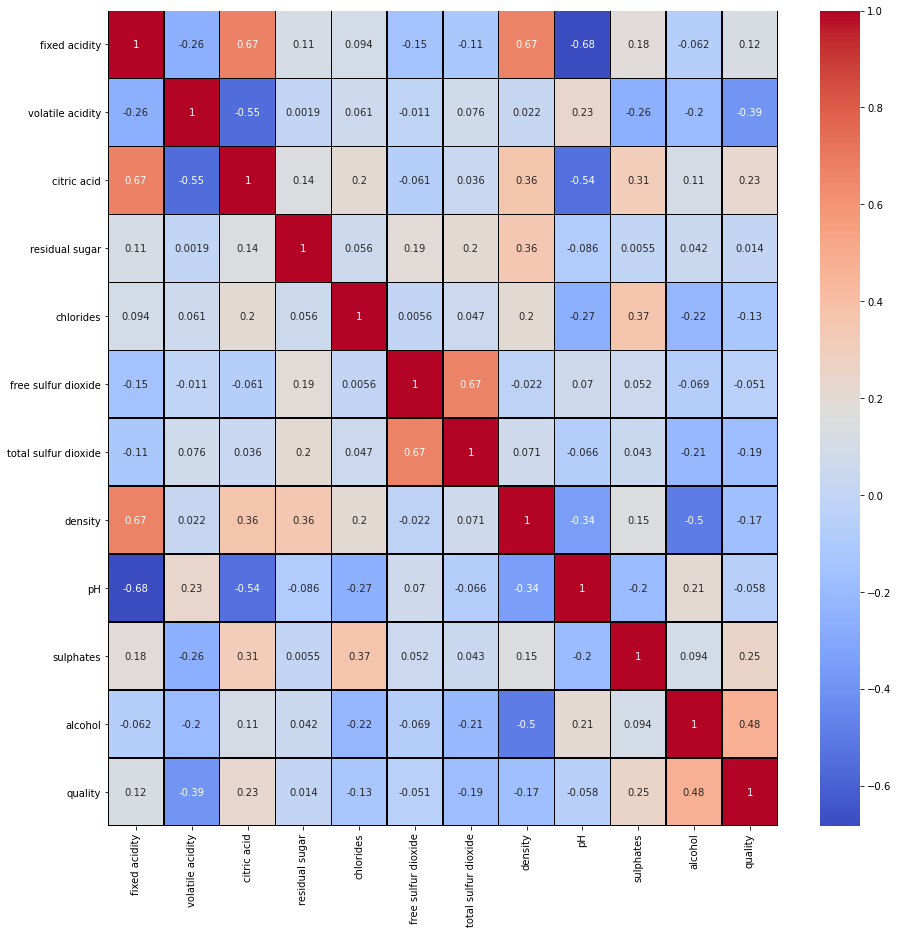

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(RedWQ.corr(),annot=True,cmap='coolwarm',linewidth=0.5,linecolor='black')

Quality is negatively coorelated with volatile acidity.

Qulaity is highly correlated with alchol,citric acid and sulphates.

Quality of wine is moderatly correlated with fixed acidity.


## EDA

### Univariative Analysis

In [14]:
cols=RedWQ.columns
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

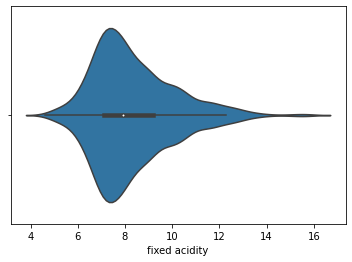

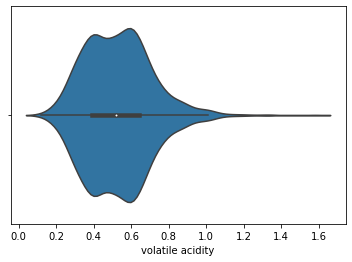

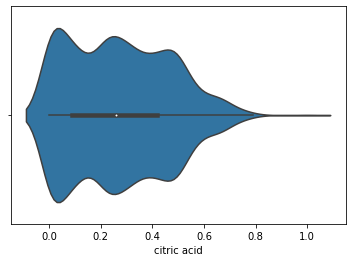

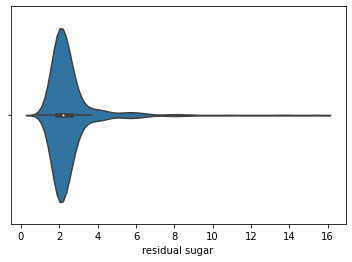

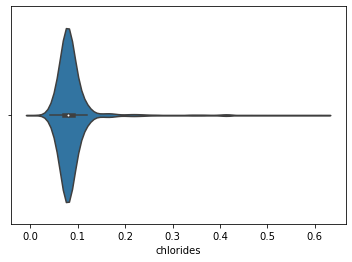

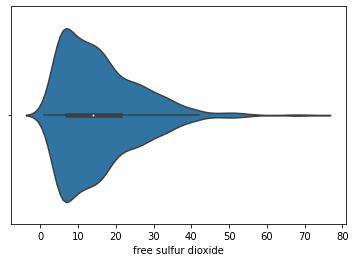

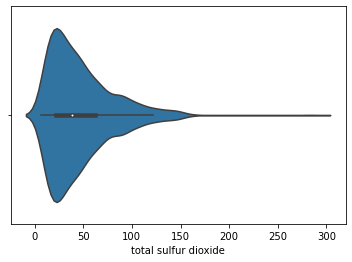

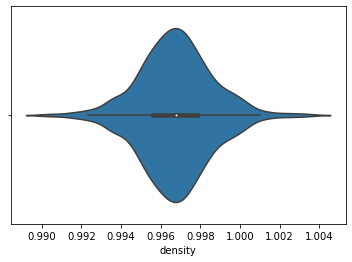

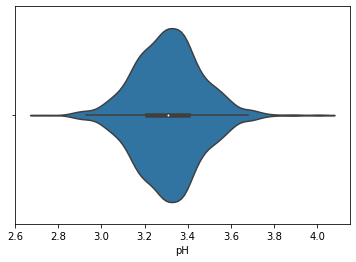

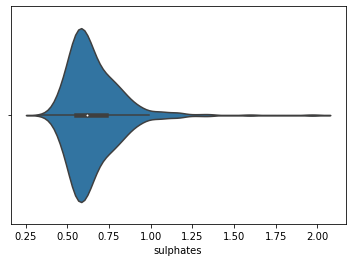

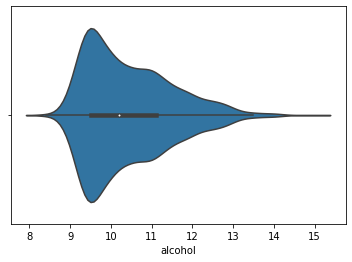

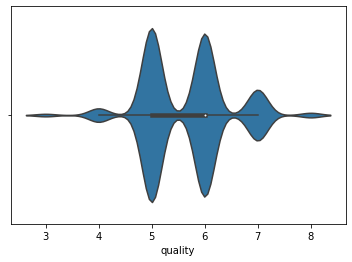

In [15]:
for i in cols:
    sns.violinplot(RedWQ[i])
    plt.show()

Fixed Acidity ->Acidity of wine is ususaly from 6 to 12 .

Volatile Acidity --->  Volatile acidity is fot most wines is ranging from 0.1 to 1.0

Citirc Acid - Citirc acid of wine is from 0  to 0.8.

Residual Sugar - Residual Sugar is ranging from 1 to 6 from most of the wines

Chlorides - Chlorides in wines is probably ranging from 0.5 to 1.5.

Density - Density of the wines range from .992 to 1.002

pH- pH of most wines is from 3 to 3.8

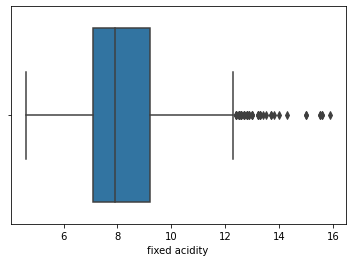

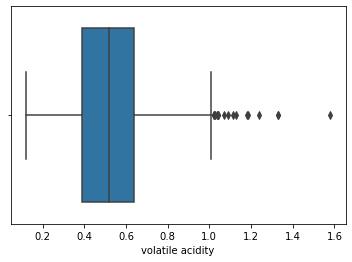

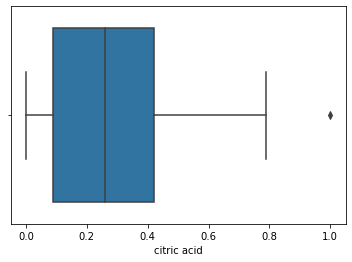

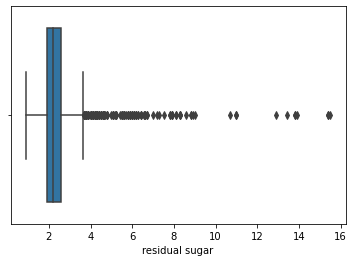

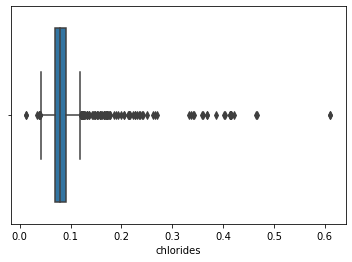

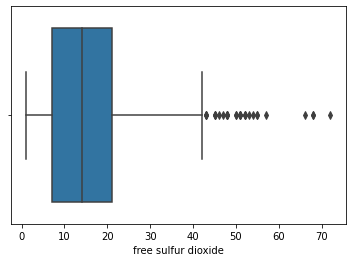

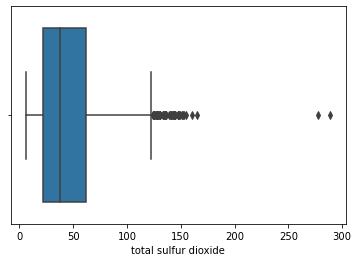

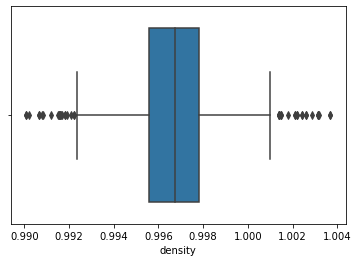

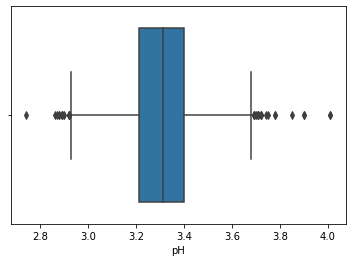

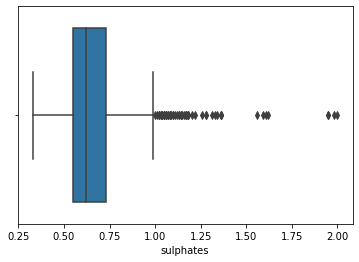

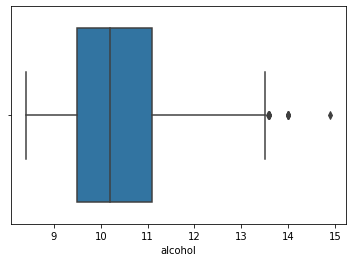

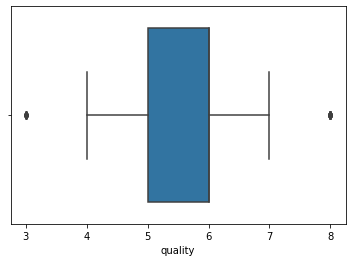

In [16]:
for i in cols:
    sns.boxplot(RedWQ[i])
    plt.show()

High amount of outliers are present in fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates

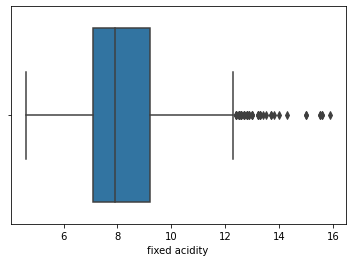

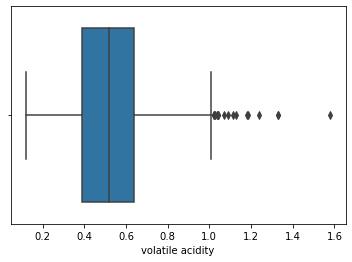

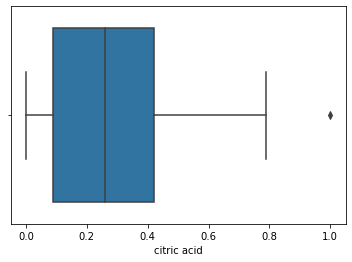

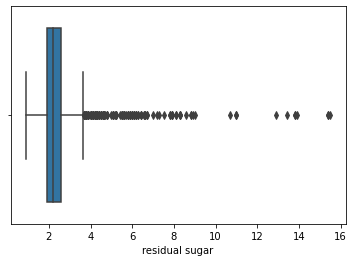

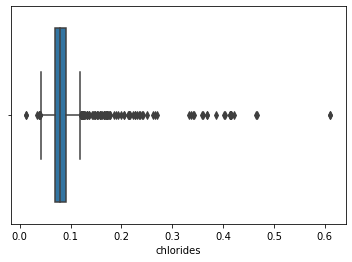

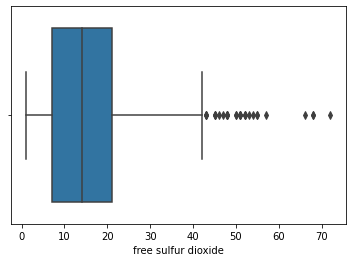

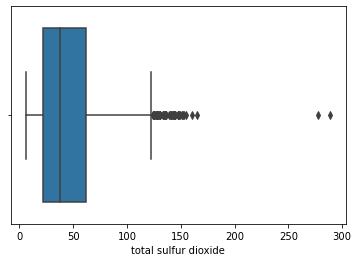

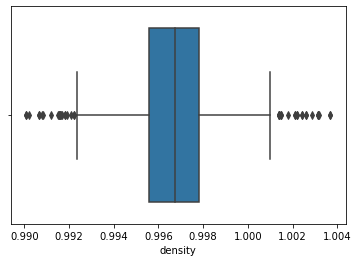

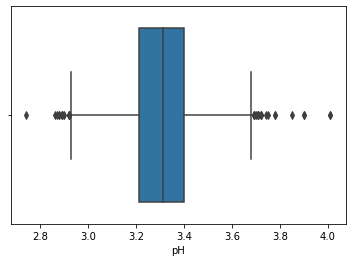

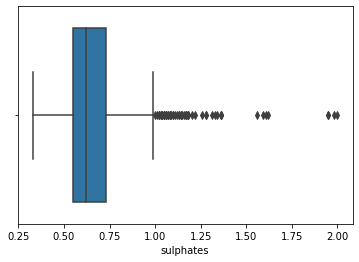

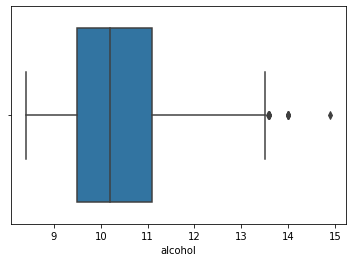

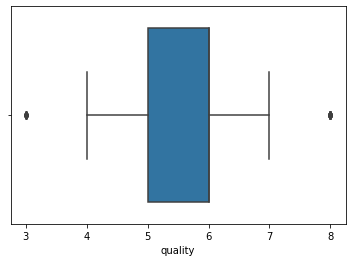

In [17]:
for i in cols:
    sns.boxplot(RedWQ[i])
    plt.show()

### Bivariative Analysis

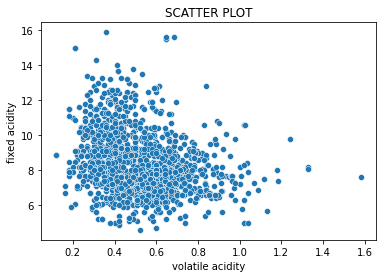

In [18]:
sns.scatterplot(x='volatile acidity',y='fixed acidity',data=RedWQ)
plt.title('SCATTER PLOT')
plt.show()

Lesser the volatile acidity more is fixed acidity.

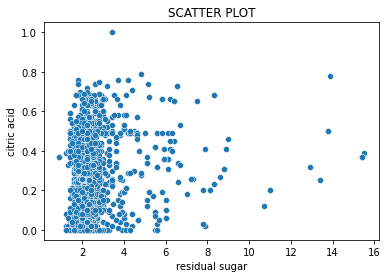

In [19]:
sns.scatterplot(x='residual sugar',y='citric acid',data=RedWQ)
plt.title('SCATTER PLOT')
plt.show()

Lesser the residual sugar more is the citric acid in the wine.

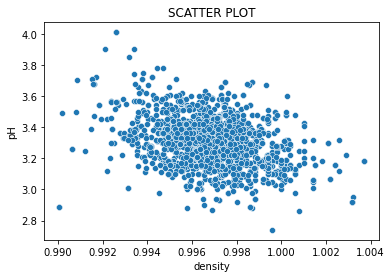

In [20]:
sns.scatterplot(x='density',y='pH',data=RedWQ)
plt.title('SCATTER PLOT')
plt.show()

Density and pH is moderately relatedwith few oultliers.

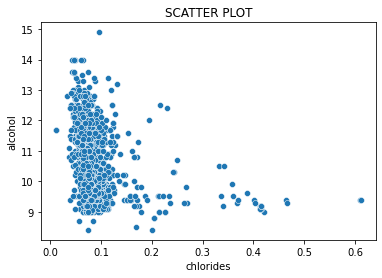

In [21]:
sns.scatterplot(x='chlorides',y='alcohol',data=RedWQ)
plt.title('SCATTER PLOT')
plt.show()

Chloride is strongly related to alchol.

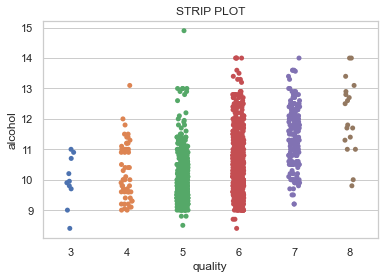

In [22]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='quality',y='alcohol',data=RedWQ)
plt.title('STRIP PLOT')
plt.show()

Wines with high alchol have better quality.

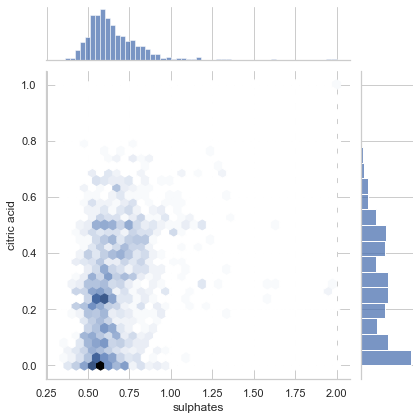

In [23]:
sns.jointplot(x='sulphates',y='citric acid',data=RedWQ,kind='hex')
plt.show()

Wines with lesser sulphate have higher citric acid.

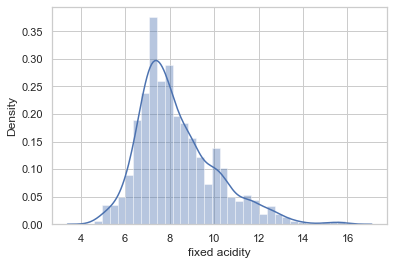

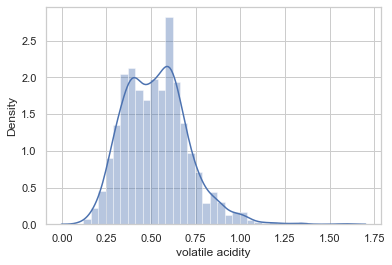

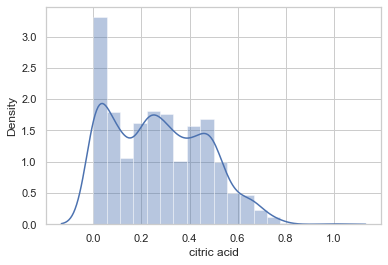

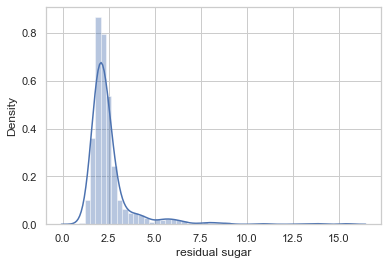

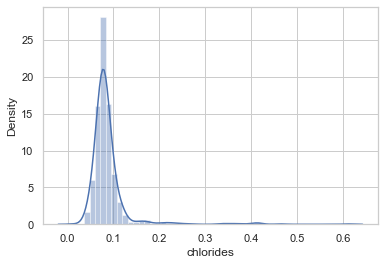

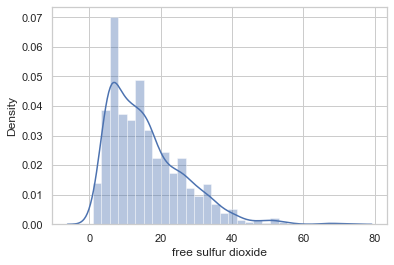

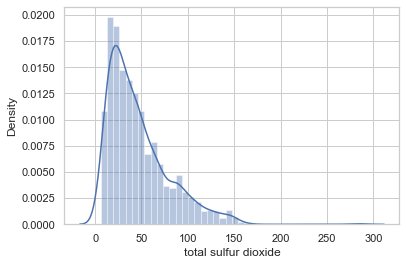

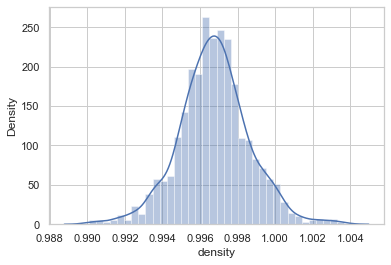

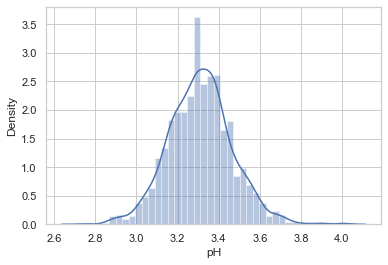

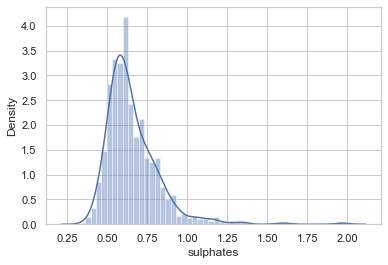

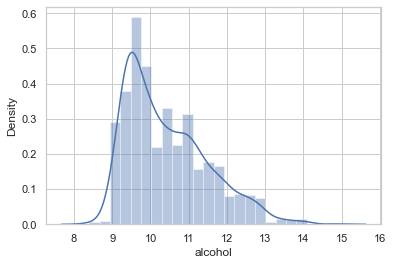

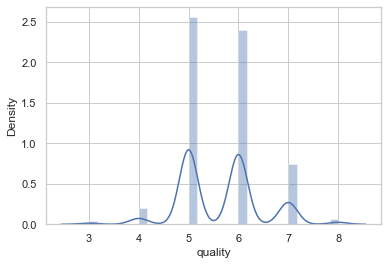

In [24]:
for i in cols:
    sns.distplot(RedWQ[i])
    plt.show()

Right skeewed - free sulphur dioxide,total sulphur dioxide,alchol.

pH,volatile acidity,chlorides are normaly distributed.


### Multivariative Analysis

<Figure size 1440x1440 with 0 Axes>

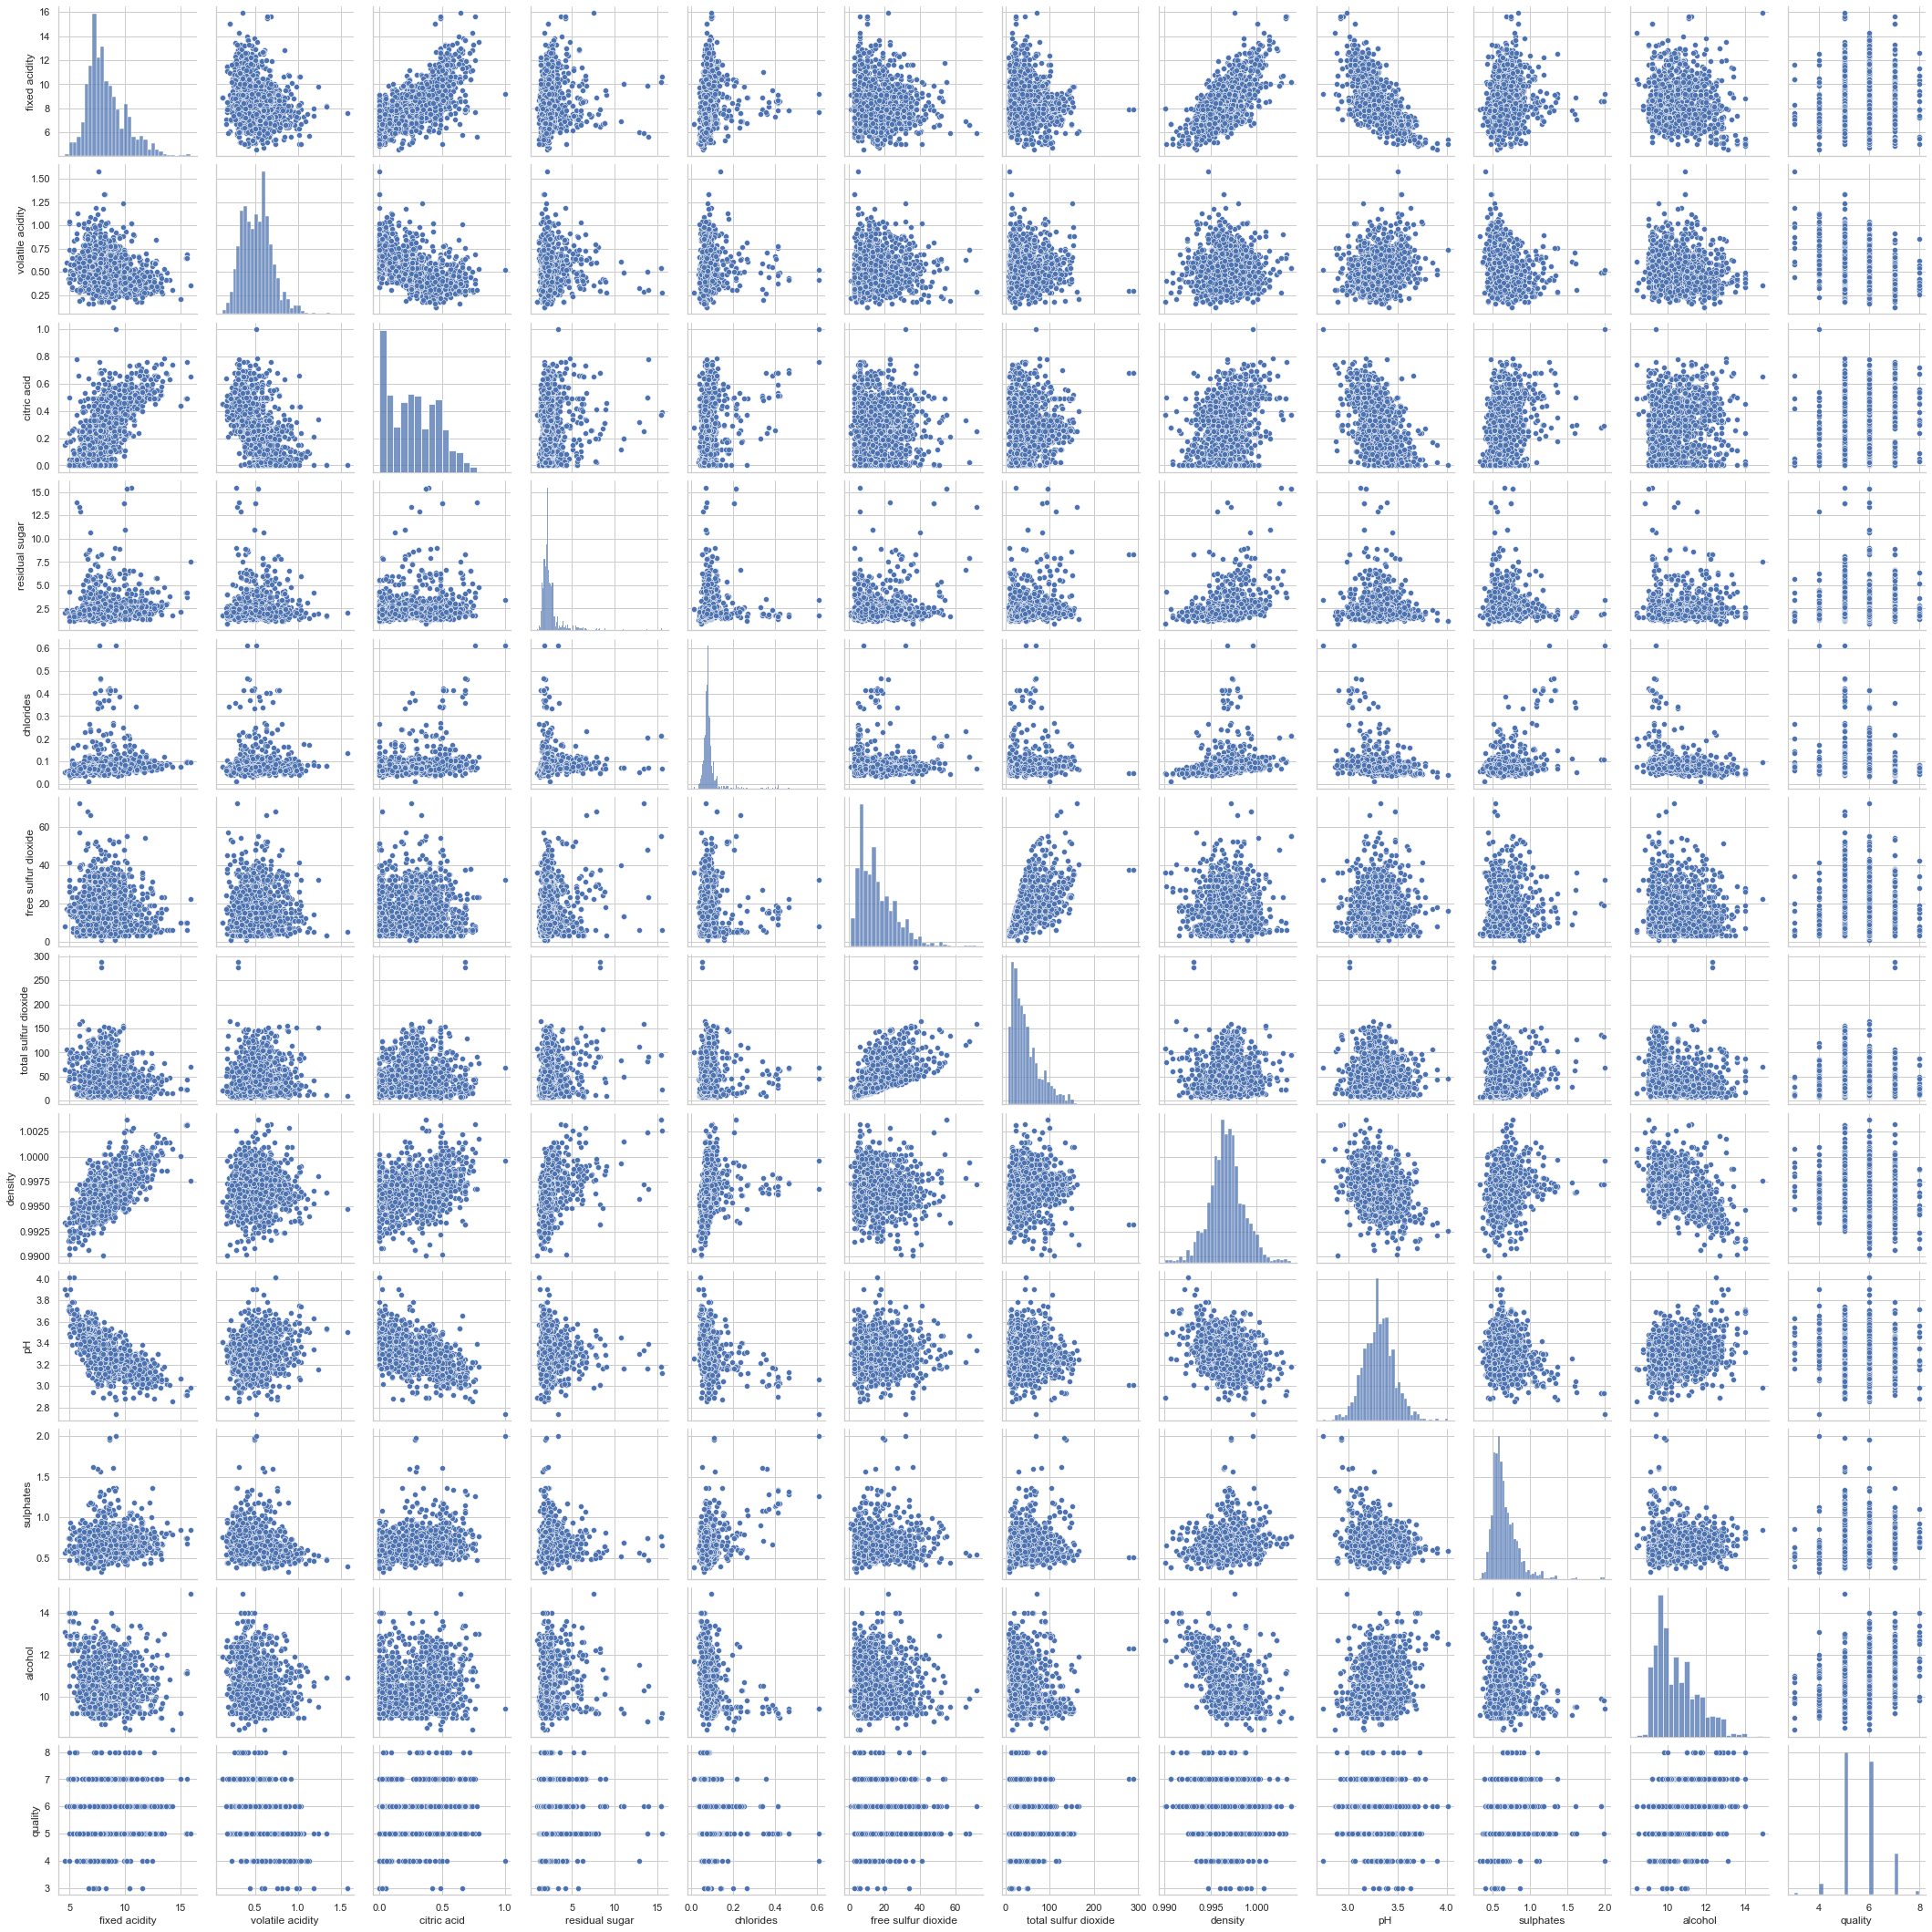

In [25]:
plt.figure(figsize=(20,20))
sns.pairplot(RedWQ)

### Removing Ouliers

In [26]:
z=np.abs(zscore(RedWQ))

In [27]:
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [28]:
threshold=3

print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [29]:
RedWQ_new=RedWQ[(z<3).all (axis=1)]

In [30]:
RedWQ.shape

(1599, 12)

In [31]:
RedWQ_new.shape

(1451, 12)

After removing the outliers from the data set , we have lost 8.88% of data which is acceptable.

#### Data Spliting in X and Y

In [32]:
x=RedWQ_new.iloc[:,0:11]
y=RedWQ_new.iloc[:,11:12]

In [33]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [34]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


Data is split in X and Y

#### Skewness

Checking the skewness of x

In [35]:
x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

Need to remove the skewness from fixed acidity,residual sugar,cholrides,free sulphur dioxide,total sulfur dioxide,sulphates,alcohol

In [36]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.sqrt(x[i])
        
x.skew()        

fixed acidity           0.603623
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.834950
chlorides               1.305836
free sulfur dioxide     0.320117
total sulfur dioxide    0.557106
density                 0.055738
pH                      0.114705
sulphates               0.614878
alcohol                 0.674270
dtype: float64

In [37]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.log(x[i])
        
x.skew() 

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.320117
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
dtype: float64

In [38]:
x['residual sugar']=np.cbrt(x['residual sugar'])

In [39]:
x['alcohol']=np.cbrt(x['alcohol'])

In [40]:
x.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          0.314402
chlorides               0.496272
free sulfur dioxide     0.320117
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.547658
dtype: float64

#### Checking the best Random State

In [41]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    predf=LG.predict(x_test)
    ac=accuracy_score(y_test,predf)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('best accuracy score',maxAccu,'at random state',maxRS)        
    

best accuracy score 0.6146788990825688 at random state 151


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=151)

In [43]:
x_train.shape

(1015, 11)

In [44]:
y_train.shape

(1015, 1)

In [45]:
x_test.shape

(436, 11)

In [46]:
y_test.shape

(436, 1)

#### Model = Logistic regression,DTC,SVM,Knn methods

In [47]:
LG=LogisticRegression()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=5)
svc=SVC(kernel='poly')
MB=MultinomialNB()

In [48]:
model=[LG,DTC,KNN,svc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('The model is:',m)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(m,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 0.6146788990825688
confusion matrix [[  0  10   6   0   0]
 [  0 146  56   1   0]
 [  0  42 116   0   0]
 [  0   6  43   6   0]
 [  0   0   3   1   0]]
classification report               precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.72      0.72      0.72       203
           6       0.52      0.73      0.61       158
           7       0.75      0.11      0.19        55
           8       0.00      0.00      0.00         4

    accuracy                           0.61       436
   macro avg       0.40      0.31      0.30       436
weighted avg       0.62      0.61      0.58       436



cross validation score
cross val score [0.53608247 0.53448276 0.6137931  0.55172414 0.52068966]
cross val score mean: 0.5513544258798436
Best score: 0.06332447320272516


The model is: DecisionTreeClassifier()
Accuracy score: 0.6513761467889908
confusion matrix [[  3   6   7   0   0]

LG = 61.4  0.06
DTC= 62.6 16
kNN= 0.54 0.07
SVC=0.51 0.02
GB=.62  0.05
RF- .71 0.14
AB= 0.38 0.07

#### Logistic Regressionalgoritm is acting the best algorithm with score 61.04% 

### Ensembling

In [49]:
rf=RandomForestClassifier(n_estimators=200)

In [50]:


    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=200)
Accuracy score: 0.7110091743119266
confusion matrix [[  0   7   9   0   0]
 [  0 163  39   1   0]
 [  0  33 118   7   0]
 [  0   4  23  28   0]
 [  0   0   3   0   1]]
classification report               precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.79      0.80      0.80       203
           6       0.61      0.75      0.67       158
           7       0.78      0.51      0.62        55
           8       1.00      0.25      0.40         4

    accuracy                           0.71       436
   macro avg       0.64      0.46      0.50       436
weighted avg       0.70      0.71      0.70       436



cross validation score
cross val score [0.5532646  0.5862069  0.65172414 0.56896552 0.57586207]
cross val score mean: 0.5872046451001303
Best score: 0.1238045292117963




for 400 the score was 0.71 and difference in mean was 0.13

for 600 the score was 0.70 and difference in mean was 0.14

for 100 the score was 0.69 and difference in mean was 0.12

for 200 the score was 0.72 and difference in mean was 0.14


In [51]:
ad=AdaBoostClassifier(n_estimators=250)

In [52]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=250)
Accuracy score: 0.38990825688073394
confusion matrix [[ 7  1  8  0  0]
 [61 52 85  5  0]
 [23 26 91 18  0]
 [ 3  6 20 20  6]
 [ 0  0  1  3  0]]
classification report               precision    recall  f1-score   support

           4       0.07      0.44      0.13        16
           5       0.61      0.26      0.36       203
           6       0.44      0.58      0.50       158
           7       0.43      0.36      0.40        55
           8       0.00      0.00      0.00         4

    accuracy                           0.39       436
   macro avg       0.31      0.33      0.28       436
weighted avg       0.50      0.39      0.40       436



cross validation score
cross val score [0.28178694 0.31034483 0.24482759 0.34482759 0.25862069]
cross val score mean: 0.2880815262471857
Best score: 0.10182673063354825




for 150 the score is 0.39  0.25

for 250 score is 0.39 and mean score is 0.28

### HYPER PARAMETER TUNNING

In [54]:
from sklearn.model_selection import GridSearchCV

In [61]:
params ={
    'C' : [0.0001,0.001,0.01,0.1,1.0,10,100,1000]
}
 

grid_lr = GridSearchCV(estimator=LG,cv=5,param_grid=params,n_jobs=4,scoring='accuracy',return_train_score=True)
 

grid_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [62]:
grid_lr.best_params_

{'C': 100}

We are getting best score at  'C': 1.0

In [63]:
grid_lr.best_score_

0.541871921182266

#### The Best score for the above data set using LogisticRegression is  54.2%

In [58]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50]}

grid_search=GridSearchCV(estimator=DTC,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [59]:
grid_search.best_score_

0.5881858641187638

In [60]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

#### The Best score for the above data set using LogisticRegression is  58.8%


### JOBLIB

In [64]:
joblib.dump(DTC,'RedWQ.obj')

['RedWQ.obj']